Concatenation of all CSV's to one csv.

In [82]:
import pandas as pd
import glob
import os


In [83]:
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

path = os.path.join(current_dir, "Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012")
print(f"Full path: {path}")
print(f"Full path: {path}")
if not os.path.isdir(path):
    raise FileNotFoundError(f"The directory '{path}' does not exist.")

csv_pattern_lower = os.path.join(path, "NSE_data_all_stocks_*.csv")
csv_files = glob.glob(csv_pattern_lower)

df_list = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df_list.append(df)
        print(f"Successfully read: {file} with {len(df)} rows.")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were successfully read
if not df_list:
    raise ValueError("No DataFrames were loaded. Please check the CSV files for readability.")

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True, sort=False)

# Create a new directory for combined output
combined_output_dir = os.path.join(current_dir, "Combined_NSE_Data")
if not os.path.exists(combined_output_dir):
    os.makedirs(combined_output_dir)
    print(f"Created new directory: {combined_output_dir}")

output_file = os.path.join(combined_output_dir, "NSE_data_all_stocks_2007_2012_combined.csv")
combined_df.to_csv(output_file, index=False)

print(f"All CSV files have been successfully combined into '{output_file}'.")

Current working directory: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression
Full path: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012
Full path: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012\NSE_data_all_stocks_2007.csv with 10608 rows.
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012\NSE_data_all_stocks_2008.csv with 10583 rows.
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_bas

In [84]:
data = pd.read_csv(output_file)

limuru_data = data[data['CODE'] == 'LIMT']
print(limuru_data.head())


           DATE  CODE        NAME 12m Low 12m High Day Low Day High Day Price  \
92     1/4/2007  LIMT  Limuru Tea     400      500     350      350       350   
1972   3/6/2007  LIMT  Limuru Tea     400      500     400      400       400   
2263  3/15/2007  LIMT  Limuru Tea     400      500     400      400       400   
2305  3/16/2007  LIMT  Limuru Tea     400      500     400      400       400   
2428  3/21/2007  LIMT  Limuru Tea     400      500     400      400       400   

     Previous Change Change% Volume Adjust Date Adjusted  
92        350      -       -    100    175  NaN      NaN  
1972      350     50  12.50%    100    200  NaN      NaN  
2263      400      -       -    500    200  NaN      NaN  
2305      400      -       -    100    200  NaN      NaN  
2428      400      -       -    100    200  NaN      NaN  


C:\Users\HP\AppData\Local\Temp\ipykernel_15452\3842580086.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file)


In [85]:
data_size = len(data['CODE'])
print(f"The total number of rows in the dataset is {data_size}")


The total number of rows in the dataset is 81504


In [86]:
print(limuru_data)

             DATE  CODE        NAME 12m Low 12m High Day Low Day High  \
92       1/4/2007  LIMT  Limuru Tea     400      500     350      350   
1972     3/6/2007  LIMT  Limuru Tea     400      500     400      400   
2263    3/15/2007  LIMT  Limuru Tea     400      500     400      400   
2305    3/16/2007  LIMT  Limuru Tea     400      500     400      400   
2428    3/21/2007  LIMT  Limuru Tea     400      500     400      400   
...           ...   ...         ...     ...      ...     ...      ...   
81244  12/21/2012  LIMT  Limuru Tea     400      500     430      430   
81308  12/24/2012  LIMT  Limuru Tea     400      500     430      430   
81372  12/27/2012  LIMT  Limuru Tea     400      500     430      430   
81436  12/28/2012  LIMT  Limuru Tea     400      500     430      430   
81500  12/31/2012  LIMT  Limuru Tea     400      500     430      430   

      Day Price Previous Change Change% Volume Adjust Date Adjusted  
92          350      350      -       -    100    175

# 📈 Predicting Limuru Stock Using Linear Regression 📊

In this project, I am using **Linear Regression** to predict the stock price of **Limuru**. The **target variable** for the model is the **Day Price** 💹, which represents the stock's price for a given day.

### 🔑 Key Points:
- **Model Type**: Linear Regression 🤖
- **Target Variable**: Day Price 💵
- **Objective**: Predict the stock price on any given day, helping stock buyers make informed decisions 🛍️.

This model will leverage historical stock data 📅 to predict the future price movement 🔮, offering valuable insights into Limuru's stock performance 🚀.


In [87]:
missing_values = limuru_data.isnull().sum()
print("🔍 Missing values in each column:")
print(missing_values)

🔍 Missing values in each column:
DATE           5
CODE           0
NAME           0
12m Low        0
12m High       0
Day Low        0
Day High       0
Day Price      0
Previous       0
Change         0
Change%        0
Volume         0
Adjust         5
Date         990
Adjusted     990
dtype: int64


In [88]:
limuru_data = limuru_data.fillna(method='ffill') 
print("\n✅ Data after forward filling missing values:")
print(data.info())



✅ Data after forward filling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81504 entries, 0 to 81503
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       70921 non-null  object
 1   CODE       81504 non-null  object
 2   NAME       81456 non-null  object
 3   12m Low    81504 non-null  object
 4   12m High   81504 non-null  object
 5   Day Low    81504 non-null  object
 6   Day High   81504 non-null  object
 7   Day Price  81504 non-null  object
 8   Previous   81504 non-null  object
 9   Change     81504 non-null  object
 10  Change%    81504 non-null  object
 11  Volume     81504 non-null  object
 12  Adjust     70921 non-null  object
 13  Date       10583 non-null  object
 14  Adjusted   10583 non-null  object
dtypes: object(15)
memory usage: 9.3+ MB
None


C:\Users\HP\AppData\Local\Temp\ipykernel_15452\2513055157.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  limuru_data = limuru_data.fillna(method='ffill')


In [89]:
missing_values = limuru_data.isnull().sum()
print("🔍 Missing values in each column:")
print(missing_values)


🔍 Missing values in each column:
DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
Date         7
Adjusted     7
dtype: int64


In [101]:
limuru_data['Change%'] = limuru_data['Change%'].str.rstrip('%').astype(float)

ValueError: could not convert string to float: '-'

### **Data Visualization: Trends Present in Limuru Stock Price** 📈  

Now that we have our dataset cleaned and preprocessed, we can analyze the distribution of stock prices, time series trends, and other related graphs to visualize the data effectively.  


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

###  Distribution of Stock Prices

---

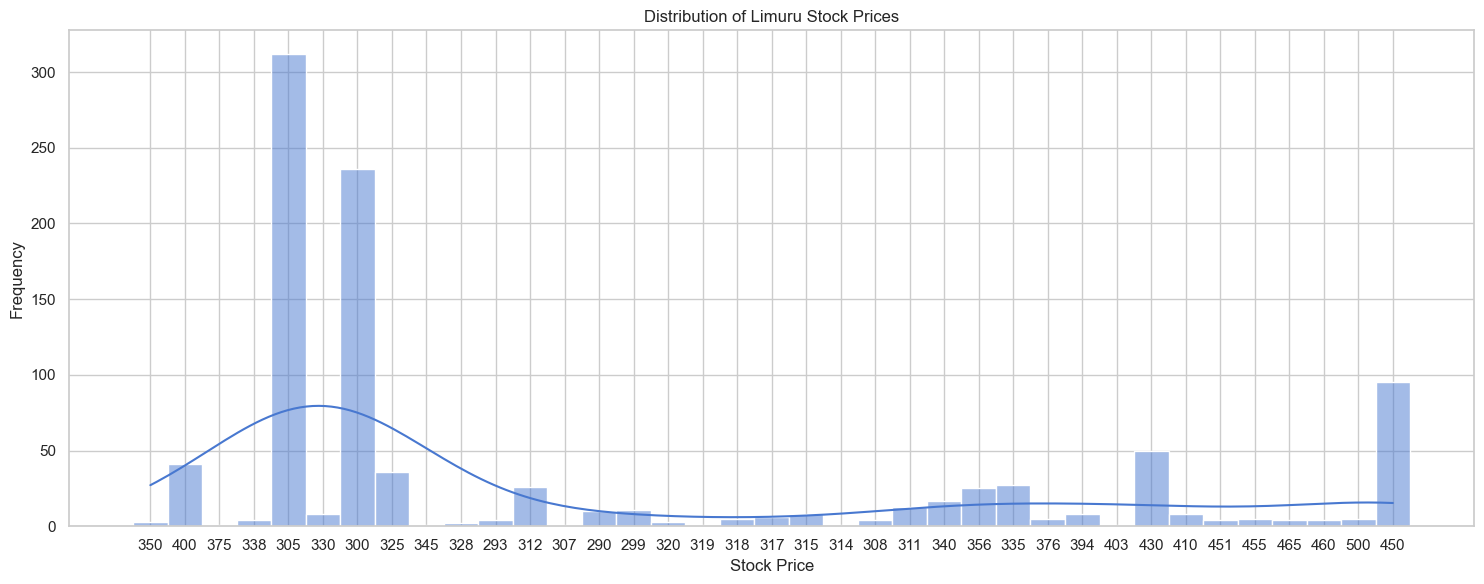

In [91]:
fig_size = (15, 6)
plt.figure(figsize=fig_size)
sns.histplot(data=limuru_data, x='Day Price', kde=True)
plt.title('Distribution of Limuru Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

###  Box Plot for Price Distribution
---

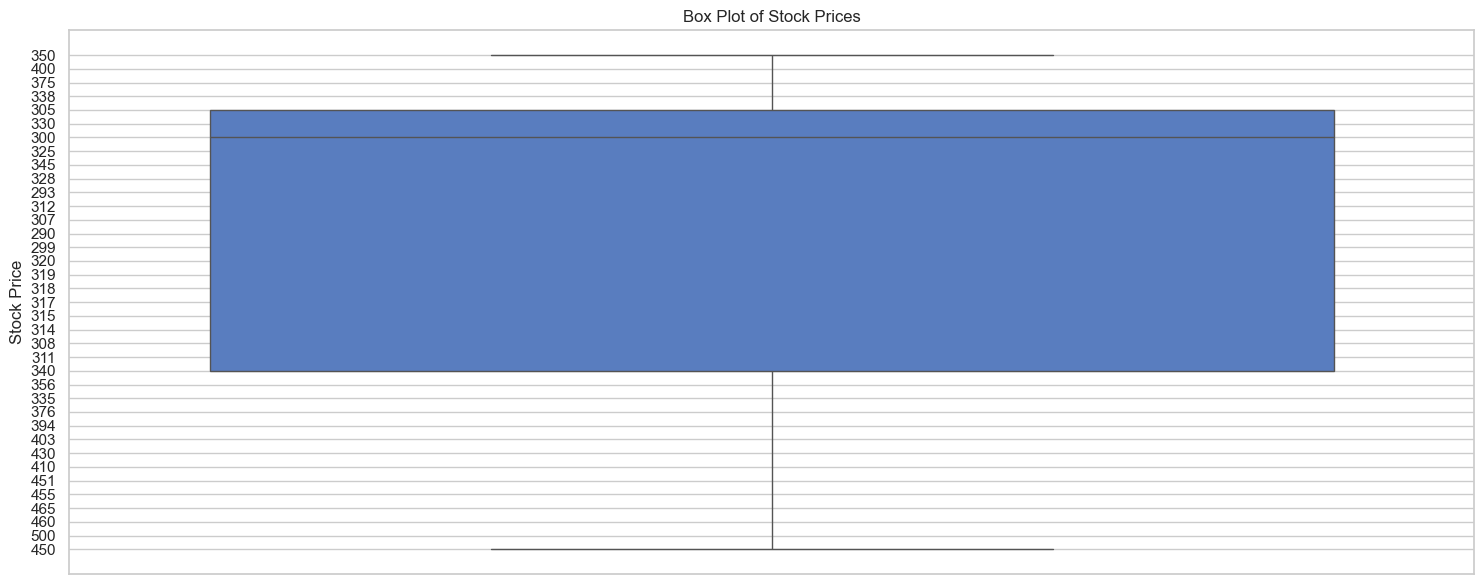

In [92]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day Price'])
plt.title('Box Plot of Stock Prices')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

### 🚀 **Training and Testing Data: The Journey Begins** 🧑‍🏫

Now that we have our dataset cleaned and preprocessed, it's time to move on to —**Training** and **Testing** our model! 🎯

---




In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [94]:
# Features and target variable
X = limuru_data[['Date', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust']] 
y = limuru_data['Day Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)